## ***Imports***

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# uyarilari dikkate alma
import warnings
warnings.filterwarnings('ignore')

sns.set_style('white')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format
# sutunun genisligi
pd.options.display.max_colwidth = 100

# font tanimlamalari
title_font = {'family': 'times new roman', 'color': 'black', 
              'weight': 'normal', 'size': 16}
axis_font  = {'family': 'times new roman', 'color': 'black', 
              'weight': 'normal', 'size': 16}
#custom color codes
mycolors = ['#CB4335','#3498DB', '#A2D9CE', 
            '#E74C3C', '#5499C7', '#73C6B6', 
            '#C39BD3', '#E59866', '#16A085']
my_palette = sns.color_palette(mycolors)

plt.rcParams["font.family"] = "times new roman"
plt.rcParams["font.size"] = "14"
plt.rcParams["axes.labelweight"] = "normal"

---
### ***Analysis for different payload size***

#### ***Data Preprocessing***

In [56]:
# veri setini dataframe icerisine yukle
hlf = pd.DataFrame([])
test_type = 'query'
test_duration=300
for payload in ['1K', '10K', '100K']:    
    for user in [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]:
        df = pd.read_csv(test_type+'/event_'+payload+'/'+str(user)+'_users_'+test_type+'_stats.csv')
        df['users'] = user
        df['payload'] = payload
        df['duration'] = test_duration
        df.drop(index=1, inplace=True)
        hlf = pd.concat([hlf, df], ignore_index=True)
        
hlf.drop(hlf.columns[range(11,23)], axis=1, inplace=True)
hlf.drop(columns=['Type'], axis=1, inplace=True)
# transaction throughput = total committed transactions / total time in secs
hlf['throughput'] = (hlf['Request Count']-hlf['Failure Count']) / hlf['duration']
hlf['failure_ratio'] = hlf['Failure Count'] / hlf['Request Count'] * 100
hlf['success_count'] = hlf['Request Count'] - hlf['Failure Count']
hlf['success_ratio'] = hlf['success_count'] / hlf['Request Count'] * 100

#### ***Plot Throughput***

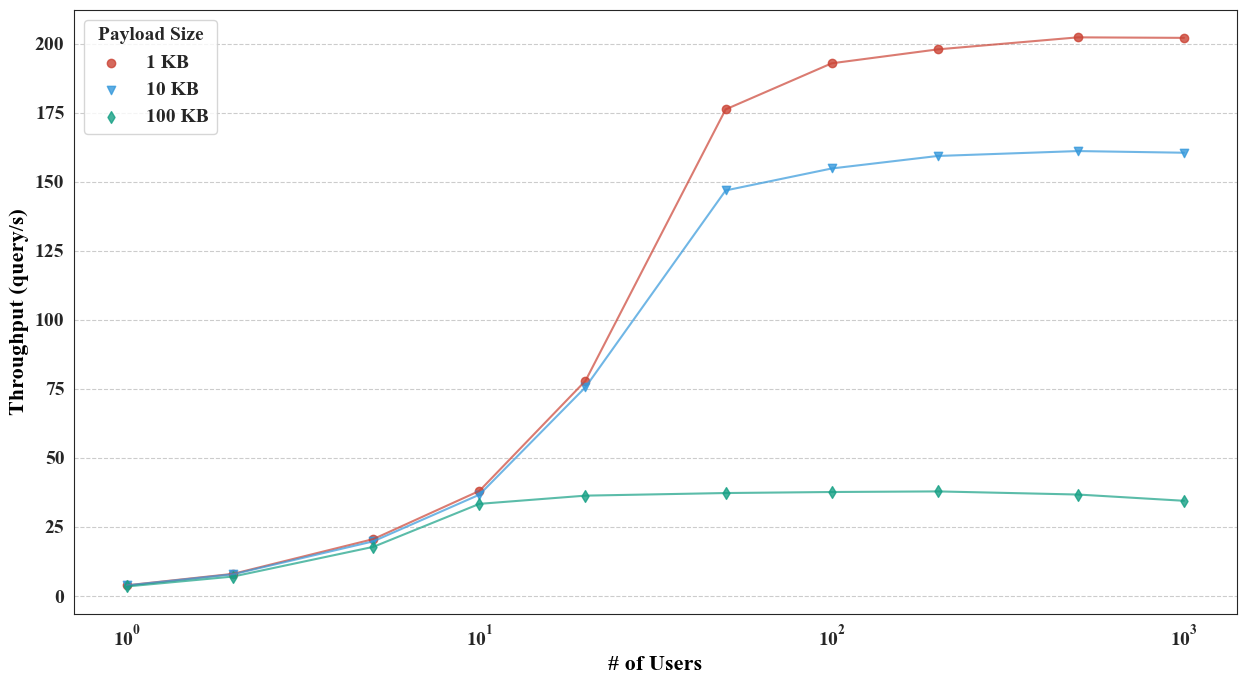

In [57]:
c = 0.5
x = hlf['users']
fig, ax0 = plt.subplots(1, 1, sharex=True, figsize=(15, 8),dpi=100)

#fig, ax = plt.subplots()
ax0.scatter(hlf[hlf['payload']=='1K']['users'],
            hlf[hlf['payload']=='1K']['throughput'], 
            marker='o',
            color=mycolors[0], 
            alpha=0.8,
            label='1 KB')
ax0.plot(hlf[hlf['payload']=='1K']['users'],
         hlf[hlf['payload']=='1K']['throughput'], 
         color=mycolors[0], 
         alpha=0.7)
ax0.scatter(hlf[hlf['payload']=='10K']['users'],
            hlf[hlf['payload']=='10K']['throughput'],
            marker='v',
            color=mycolors[1], 
            alpha=0.8,
            label='10 KB')
ax0.plot(hlf[hlf['payload']=='10K']['users'],
         hlf[hlf['payload']=='10K']['throughput'], 
         color=mycolors[1], 
         alpha=0.7)
ax0.scatter(hlf[hlf['payload']=='100K']['users'],
            hlf[hlf['payload']=='100K']['throughput'],
            marker='d',
            color=mycolors[8], 
            alpha=0.8,
            label='100 KB')
ax0.plot(hlf[hlf['payload']=='100K']['users'],
         hlf[hlf['payload']=='100K']['throughput'], 
         color=mycolors[8], 
         alpha=0.7)
if test_type=='query':
    ax0.set_ylabel('Throughput (query/s)', fontdict=axis_font)
elif test_type=='create':
    ax0.set_ylabel('Throughput (commit/s)', fontdict=axis_font)
ax0.set_xlabel('# of Users', fontdict=axis_font)
ax0.set_xscale('log')
ax0.legend(title='Payload Size',loc=2)
plt.gca().yaxis.grid(True, linestyle='--')
plt.savefig('./images/'+test_type+'_payload_size_throughput.png', 
                bbox_inches='tight')
plt.show()

#### ***Plot Success***

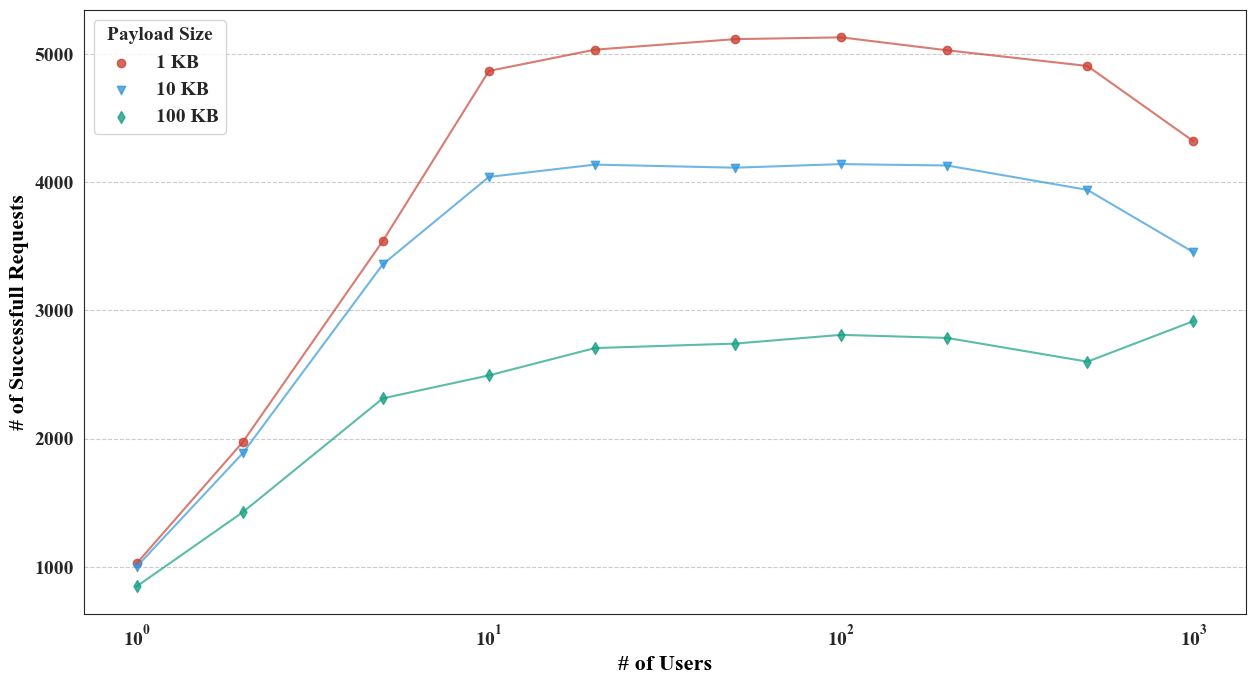

In [51]:
c = 0.5
x = hlf['users']
fig, ax0 = plt.subplots(1, 1, sharex=True, figsize=(15, 8),dpi=100)

#fig, ax = plt.subplots()
ax0.scatter(hlf[hlf['payload']=='1K']['users'],
            hlf[hlf['payload']=='1K']['success_count'], 
            marker='o',
            color=mycolors[0], 
            alpha=0.8,
            label='1 KB')
ax0.plot(hlf[hlf['payload']=='1K']['users'],
         hlf[hlf['payload']=='1K']['success_count'], 
         color=mycolors[0], 
         alpha=0.7)
ax0.scatter(hlf[hlf['payload']=='10K']['users'],
            hlf[hlf['payload']=='10K']['success_count'],
            marker='v',
            color=mycolors[1], 
            alpha=0.8,
            label='10 KB')
ax0.plot(hlf[hlf['payload']=='10K']['users'],
         hlf[hlf['payload']=='10K']['success_count'], 
         color=mycolors[1], 
         alpha=0.7)
ax0.scatter(hlf[hlf['payload']=='100K']['users'],
            hlf[hlf['payload']=='100K']['success_count'],
            marker='d',
            color=mycolors[8], 
            alpha=0.8,
            label='100 KB')
ax0.plot(hlf[hlf['payload']=='100K']['users'],
         hlf[hlf['payload']=='100K']['success_count'], 
         color=mycolors[8], 
         alpha=0.7)
if test_type=='query':
    ax0.set_ylabel('# of Successfull Requests', fontdict=axis_font)
elif test_type=='create':
    ax0.set_ylabel('# of Successfull Requests', fontdict=axis_font)
ax0.set_xlabel('# of Users', fontdict=axis_font)
ax0.set_xscale('log')
ax0.legend(title='Payload Size',loc=2)
plt.gca().yaxis.grid(True, linestyle='--')
plt.savefig('./images/'+test_type+'_payload_size_success.png', 
                bbox_inches='tight')
plt.show()

#### ***Plot Failures***

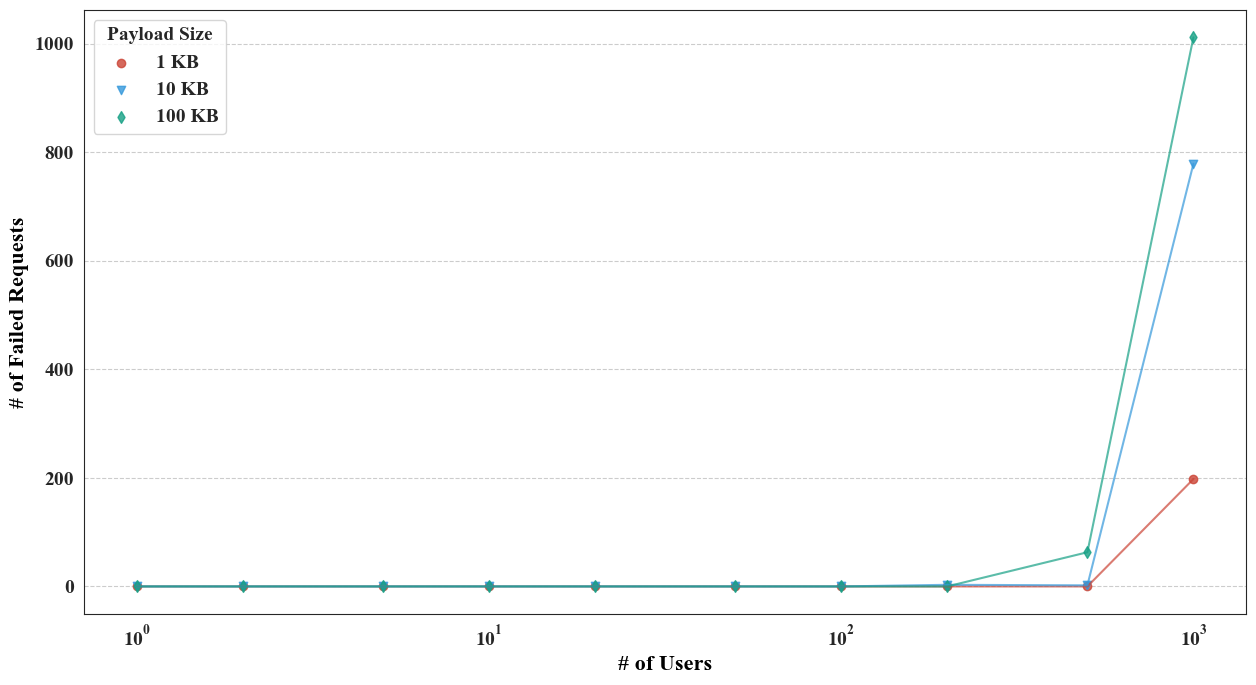

In [52]:
c = 0.5
x = hlf['users']
fig, ax0 = plt.subplots(1, 1, sharex=True, figsize=(15, 8),dpi=100)

#fig, ax = plt.subplots()
ax0.scatter(hlf[hlf['payload']=='1K']['users'],
            hlf[hlf['payload']=='1K']['Failure Count'], 
            marker='o',
            color=mycolors[0], 
            alpha=0.8,
            label='1 KB')
ax0.plot(hlf[hlf['payload']=='1K']['users'],
         hlf[hlf['payload']=='1K']['Failure Count'], 
         color=mycolors[0], 
         alpha=0.7)
ax0.scatter(hlf[hlf['payload']=='10K']['users'],
            hlf[hlf['payload']=='10K']['Failure Count'],
            marker='v',
            color=mycolors[1], 
            alpha=0.8,
            label='10 KB')
ax0.plot(hlf[hlf['payload']=='10K']['users'],
         hlf[hlf['payload']=='10K']['Failure Count'], 
         color=mycolors[1], 
         alpha=0.7)
ax0.scatter(hlf[hlf['payload']=='100K']['users'],
            hlf[hlf['payload']=='100K']['Failure Count'],
            marker='d',
            color=mycolors[8], 
            alpha=0.8,
            label='100 KB')
ax0.plot(hlf[hlf['payload']=='100K']['users'],
         hlf[hlf['payload']=='100K']['Failure Count'], 
         color=mycolors[8], 
         alpha=0.7)
if test_type=='query':
    ax0.set_ylabel('# of Failed Requests', fontdict=axis_font)
elif test_type=='create':
    ax0.set_ylabel('# of Failed Requests', fontdict=axis_font)
ax0.set_xlabel('# of Users', fontdict=axis_font)
ax0.set_xscale('log')
ax0.legend(title='Payload Size',loc=2)
plt.gca().yaxis.grid(True, linestyle='--')
plt.savefig('./images/'+test_type+'_payload_size_failure.png', 
                bbox_inches='tight')
plt.show()